In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np


db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "54321",
                             database = "ecommerce")
cur = db.cursor()



# List all unique cities where customers are located.   
    


In [74]:
query =""" select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df=pd.DataFrame(data)
df.head()



,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [21]:
query ="""  select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

"total values placed in 2017 are:",data[0][0]



('total values placed in 2017 are:', 225505)

# Find the total sales per category.

In [36]:
query =""" 
SELECT concat(price,"+",freight_value)FROM  ecommerce.order_items as selles"""

cur.execute(query)

data = cur.fetchall()

" total sales equals to price + freight value",data




(' total sales equals to price + freight value',
 [('58.9+13.29',),
  ('239.9+19.93',),
  ('199+17.87',),
  ('12.99+12.79',),
  ('199.9+18.14',),
  ('21.9+12.69',),
  ('19.9+11.85',),
  ('810+70.75',),
  ('145.95+11.65',),
  ('53.99+11.4',),
  ('59.99+8.88',),
  ('45+12.98',),
  ('74+23.32',),
  ('49.9+13.37',),
  ('49.9+13.37',),
  ('99.9+27.65',),
  ('639+11.34',),
  ('144+8.77',),
  ('99+13.71',),
  ('25+16.11',),
  ('47.9+8.88',),
  ('21.99+11.85',),
  ('119.99+44.4',),
  ('49+15.1',),
  ('48.9+16.6',),
  ('219.9+16.98',),
  ('289+26.33',),
  ('109.9+25.51',),
  ('27.9+7.94',),
  ('119.9+17.32',),
  ('397+24.65',),
  ('59.9+23.35',),
  ('21.33+15.1',),
  ('21.33+15.1',),
  ('21.33+15.1',),
  ('16.5+14.1',),
  ('21.9+15.1',),
  ('39+16.11',),
  ('49.75+20.8',),
  ('809.1+44.29',),
  ('99.99+13.72',),
  ('59.9+19.95',),
  ('24.89+17.63',),
  ('24.89+17.63',),
  ('24.89+17.63',),
  ('54+8.54',),
  ('81.99+13.01',),
  ('99+13.71',),
  ('18.99+7.78',),
  ('18.99+7.78',),
  ('38.33+16.79

# Calculate the percentage of order_status that were delivered.

In [50]:
query ="""SELECT (sum(case when order_status ="delivered" then 1 else 0 end))/count(*)*100 FROM ecommerce.orders"""

cur.execute(query)

data = cur.fetchall()
data


[(Decimal('97.0203'),)]

# Count the number of customers from each state. 


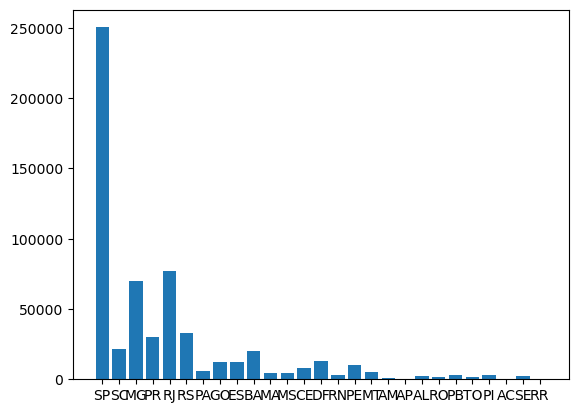

In [64]:
query ="""
SELECT customer_state,count(customer_id) FROM ecommerce.customers group by customer_state"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["state","no of customers"])

plt.bar(df["state"],df["no of customers"])

plt.show()


# Calculate the number of orders per month in 2018.

In [81]:
query ="""SELECT monthname(order_purchase_timestamp) as months ,count(order_id) as order_c FROM
ecommerce.orders where year(order_purchase_timestamp)=2018 
group by  months"""


cur.execute(query)

data = cur.fetchall()

df= pd.DataFrame(data,columns=["months of 2018","order_count"])

df

,months of 2018,order_count
0,July,31460
1,August,32560
2,February,33640
3,June,30835
4,March,36055
5,January,36345
6,May,34365
7,April,34695
8,September,80
9,October,20


#  Identify the correlation between product price and the number of times a product has been purchased.

In [100]:
cur = db.cursor()
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a=np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])



the correlation is -0.10631514167157562
